In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as special
from scipy.optimize import curve_fit
import miscellaneous_utils as misc

pval_thresh = 0.05


# Taylor's Law

In [2]:
def powlaw(x, a, b) :
    return a * np.power(x, b)

def linlaw(x, a, b) :
    return a + x * b

def curve_fit_log(xdata, ydata) :
    """Fit data to a power law with weights according to a log scale"""
    # Weights according to a log scale
    # Apply fscalex
    xdata_log = np.log10(xdata)
    # Apply fscaley
    ydata_log = np.log10(ydata)
    # Fit linear
    popt_log, pcov_log = curve_fit(linlaw, xdata_log, ydata_log)
    #print(popt_log, pcov_log)
    # Apply fscaley^-1 to fitted data
    ydatafit_log = np.power(10, linlaw(xdata_log, *popt_log))
    # There is no need to apply fscalex^-1 as original data is already available
    
    return (popt_log, pcov_log, ydatafit_log)


In [75]:
df_am = pd.read_csv("strains_am.csv",index_col=0)
df_ao = pd.read_csv("strains_ao.csv",index_col=0)
df_an = pd.read_csv("strains_an.csv",index_col=0)
df_ae = pd.read_csv("strains_ae.csv",index_col=0)

df_am_chisq = pd.read_csv("/u/home/r/rwolff/strain_stability_revisions/strainstability/analysis/chisq/Poyet/am_strain_chisq_test_cross.txt",index_col=0,header=None)
df_ao_chisq = pd.read_csv("/u/home/r/rwolff/strain_stability_revisions/strainstability/analysis/chisq/Poyet/ao_strain_chisq_test_cross.txt",index_col=0,header=None)
df_an_chisq = pd.read_csv("/u/home/r/rwolff/strain_stability_revisions/strainstability/analysis/chisq/Poyet/an_strain_chisq_test_cross.txt",index_col=0,header=None)
df_ae_chisq = pd.read_csv("/u/home/r/rwolff/strain_stability_revisions/strainstability/analysis/chisq/Poyet/ae_strain_chisq_test_cross.txt",index_col=0,header=None)

df_am = df_am.loc[df_am_chisq.index]
df_ao = df_ao.loc[df_ao_chisq.index]
df_an = df_an.loc[df_an_chisq.index]
df_ae = df_ae.loc[df_ae_chisq.index]

In [83]:
(df_ae_chisq > .05).mean()

1    0.692308
dtype: float64

In [76]:
df_am = df_am/df_am.sum()
df_ao = df_ao/df_ao.sum()
df_an = df_an/df_an.sum()
df_ae = df_ae/df_ae.sum()

df_am = df_am.dropna(axis=1,how="all")
df_an = df_an.dropna(axis=1,how="all")
df_ao = df_ao.dropna(axis=1,how="all")
df_ae = df_ae.dropna(axis=1,how="all")

df = df_am.append(df_ao).append(df_an).append(df_ae)
df_am_fail = df_am.loc[(df_am_chisq[df_am_chisq < pval_thresh].dropna()).index]
df_ao_fail = df_ao.loc[(df_ao_chisq[df_ao_chisq < pval_thresh].dropna()).index]
df_an_fail = df_an.loc[(df_an_chisq[df_an_chisq < pval_thresh].dropna()).index]
df_ae_fail = df_ae.loc[(df_ae_chisq[df_ae_chisq < pval_thresh].dropna()).index]

df_am_pass = df_am.loc[(df_am_chisq[df_am_chisq > pval_thresh].dropna()).index]
df_ao_pass = df_ao.loc[(df_ao_chisq[df_ao_chisq > pval_thresh].dropna()).index]
df_an_pass = df_an.loc[(df_an_chisq[df_an_chisq > pval_thresh].dropna()).index]
df_ae_pass = df_ae.loc[(df_ae_chisq[df_ae_chisq > pval_thresh].dropna()).index]

df_fail = df_am_fail.append(df_ao_fail).append(df_an_fail).append(df_ae_fail)
df_pass = df_am_pass.append(df_ao_pass).append(df_an_pass).append(df_ae_pass)


In [63]:
num_failed = df_an_fail.shape[0] + df_ao_fail.shape[0] + df_am_fail.shape[0] + df_ae_fail.shape[0]

In [64]:
num_failed

13

In [65]:
num_passed = df_an_pass.shape[0] + df_ao_pass.shape[0] + df_am_pass.shape[0] + df_ae_pass.shape[0]

In [66]:
num_passed

47

In [13]:
total_num_strains = df_am_chisq.shape[0] + df_ao_chisq.shape[0] + df_an_chisq.shape[0] + df_ae_chisq.shape[0]

In [14]:
(1.0*total_num_strains - num_failed)/total_num_strains 

0.7833333333333333

In [15]:
meansh = df.T.mean()
varh = df.T.var()

meansh_pass = df_pass.T.mean()
varh_pass = df_pass.T.var()

meansh_fail = df_fail.T.mean()
varh_fail = df_fail.T.var()

C=curve_fit_log(meansh.values, varh.values)

popt_log, pcov_log, ydatafit_log = C
popt_log[0] = 10**popt_log[0]

xdata_log = np.log10(meansh.values)
xdata_log_space = np.logspace(np.log10(.3*min(meansh.values)),0,100000)

Text(0,0.5,'$\\sigma_{x_i}^2$')

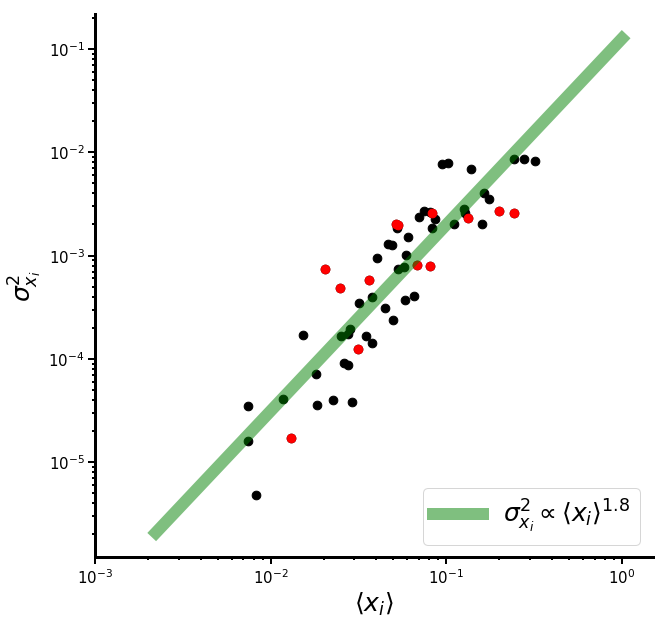

In [16]:
fig,TL_axs = plt.subplots(figsize=(10,10))

TL_axs.tick_params(axis='both', which='major', labelsize=15)
TL_axs.tick_params(axis='both', which='major', labelsize=15)
TL_axs.spines['top'].set_visible(False)
TL_axs.spines['right'].set_visible(False)
TL_axs.spines['left'].set_linewidth(3)
TL_axs.spines['bottom'].set_linewidth(3)
TL_axs.tick_params('both', length=7, width=2, which='major')
TL_axs.tick_params('both', length=3, width=2, which='minor')

#TL_axs.grid(True)

fig.suptitle("",size=30)

TL_axs.scatter(meansh.values, varh.values,color="k",s=75)
TL_axs.scatter(meansh_fail.values,varh_fail.values,color= "red",s=75)
TL_axs.plot(xdata_log_space,powlaw(xdata_log_space,*popt_log),color="green",lw = 12,alpha=.5,label= r"$\sigma_{x_i}^2 \propto \langle x_i \rangle^{%s}$" % np.around(popt_log[1],2),zorder=1000)
TL_axs.loglog()

TL_axs.set_xlim([1e-3,1.5])

TL_axs.legend(loc='lower right', prop={'size': 25})

TL_axs.set_xlabel(r"$\langle x_i \rangle$",size=25)
TL_axs.set_ylabel(r"$\sigma_{x_i}^2$",size=25,rotation=90)

In [17]:
meansh_fail

0
Bacteroides_ovatus_58035_B              0.031369
Bacteroides_vulgatus_57955_A            0.024951
Ruminococcus_bromii_62047_A             0.053402
Faecalibacterium_prausnitzii_61481_A    0.020472
Faecalibacterium_prausnitzii_61481_B    0.051488
Bacteroides_clarus_62282_A              0.082799
Bacteroides_massiliensis_44749_A        0.080756
Bacteroides_uniformis_57318_B           0.036423
Bacteroides_vulgatus_57955_A            0.068351
Bacteroides_massiliensis_44749_A        0.013096
Bacteroides_massiliensis_44749_B        0.241943
Bacteroides_uniformis_57318_A           0.198707
Bacteroides_vulgatus_57955_A            0.132545
dtype: float64

In [18]:
varh_fail

0
Bacteroides_ovatus_58035_B              0.000124
Bacteroides_vulgatus_57955_A            0.000484
Ruminococcus_bromii_62047_A             0.001983
Faecalibacterium_prausnitzii_61481_A    0.000733
Faecalibacterium_prausnitzii_61481_B    0.002011
Bacteroides_clarus_62282_A              0.002608
Bacteroides_massiliensis_44749_A        0.000786
Bacteroides_uniformis_57318_B           0.000583
Bacteroides_vulgatus_57955_A            0.000818
Bacteroides_massiliensis_44749_A        0.000017
Bacteroides_massiliensis_44749_B        0.002593
Bacteroides_uniformis_57318_A           0.002689
Bacteroides_vulgatus_57955_A            0.002290
dtype: float64

Text(0,0.5,'$\\sigma_{x_i}^2$')

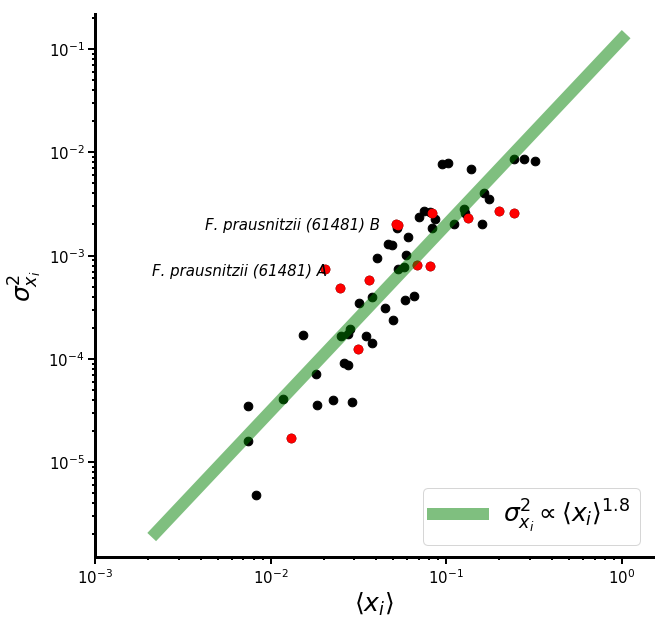

In [20]:
fig,TL_axs = plt.subplots(figsize=(10,10))

TL_axs.tick_params(axis='both', which='major', labelsize=15)
TL_axs.tick_params(axis='both', which='major', labelsize=15)
TL_axs.spines['top'].set_visible(False)
TL_axs.spines['right'].set_visible(False)
TL_axs.spines['left'].set_linewidth(3)
TL_axs.spines['bottom'].set_linewidth(3)
TL_axs.tick_params('both', length=7, width=2, which='major')
TL_axs.tick_params('both', length=3, width=2, which='minor')

#TL_axs.grid(True)

TL_axs.text(0.022114 - .02, 0.000644, 'F. prausnitzii (61481) A', fontsize = 15,fontstyle="italic")
TL_axs.text(0.043702 - .0395, 0.001768, 'F. prausnitzii (61481) B', fontsize = 15,fontstyle="italic")


fig.suptitle("",size=30)

TL_axs.scatter(meansh.values, varh.values,color="k",s=75)
TL_axs.scatter(meansh_fail.values,varh_fail.values,color= "red",s=75)
TL_axs.plot(xdata_log_space,powlaw(xdata_log_space,*popt_log),color="green",lw = 12,alpha=.5,label= r"$\sigma_{x_i}^2 \propto \langle x_i \rangle^{%s}$" % np.around(popt_log[1],2),zorder=1000)
TL_axs.loglog()

TL_axs.set_xlim([1e-3,1.5])

TL_axs.legend(loc='lower right', prop={'size': 25})

TL_axs.set_xlabel(r"$\langle x_i \rangle$",size=25)
TL_axs.set_ylabel(r"$\sigma_{x_i}^2$",size=25,rotation=90)

### t-test shows that coefficient of variation for failing strains is higher than for passing ones

In [21]:
from scipy.stats import ttest_ind

In [22]:
coeff_var_pass = (np.sqrt(varh_pass)/meansh_pass)
coeff_var_fail = (np.sqrt(varh_fail)/meansh_fail)

In [23]:
ttest_ind(coeff_var_pass,coeff_var_fail)

Ttest_indResult(statistic=-1.0170937872154584, pvalue=0.3133328761663681)

### Supplemental Taylor's Law figure broken down by host

Text(0.5,0.035,'$\\langle x_i \\rangle$')

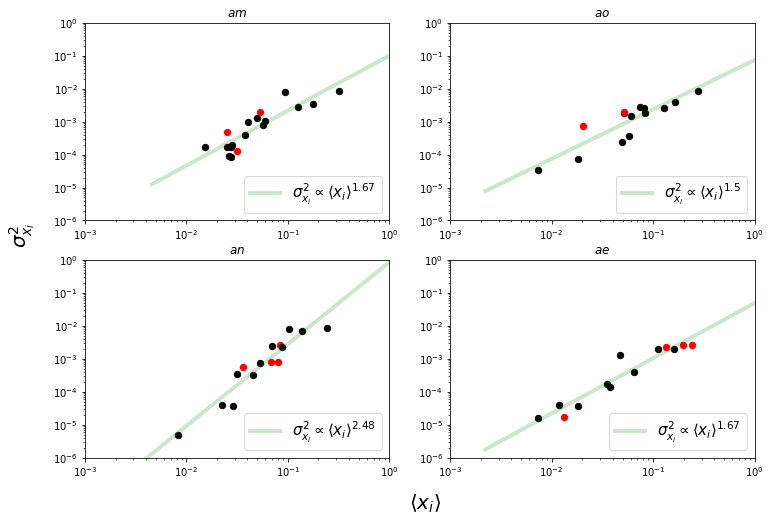

In [24]:

fig,axs = plt.subplots(2,2,figsize=(12,8))

axs = axs.ravel()

means = df_am.T.mean()
var = df_am.T.var()

C=curve_fit_log(means.values, var.values)

popt_log, pcov_log, ydatafit_log = C
popt_log[0] = 10**popt_log[0]

xdata_log = np.log10(means.values)
xdata_log_space = np.logspace(np.log10(.3*min(means.values)),0,100000)

for strain in df_am_chisq.index:
    if df_am_chisq.loc[strain].values[0] < pval_thresh:
        axs[0].scatter(means.loc[strain],var.loc[strain],color="red",s=40)
    else:
        axs[0].scatter(means.loc[strain],var.loc[strain],color="k",s=40)
    
axs[0].plot(xdata_log_space,powlaw(xdata_log_space,*popt_log),color="green",lw = 4,alpha=.2,label= r"$\sigma_{x_i}^2 \propto \langle x_i \rangle^{%s}$" % np.around(popt_log[1],2),zorder=1000)
axs[0].title.set_text(r'$\mathit{am}$')


means = df_ao.T.mean()
var = df_ao.T.var()

C=curve_fit_log(means.values, var.values)

popt_log, pcov_log, ydatafit_log = C
popt_log[0] = 10**popt_log[0]

xdata_log = np.log10(means.values)
xdata_log_space = np.logspace(np.log10(.3*min(means.values)),0,100000)

for strain in df_ao_chisq.index:
    if df_ao_chisq.loc[strain].values[0] < pval_thresh:
        axs[1].scatter(means.loc[strain],var.loc[strain],color="red",s=40)
    else:
        axs[1].scatter(means.loc[strain],var.loc[strain],color="k",s=40)
    
axs[1].plot(xdata_log_space,powlaw(xdata_log_space,*popt_log),color="green",lw = 4,alpha=.2,label= r"$\sigma_{x_i}^2 \propto \langle x_i \rangle^{%s}$" % np.around(popt_log[1],2),zorder=1000)
axs[1].title.set_text(r'$\mathit{ao}$')

means = df_an.T.mean()
var = df_an.T.var()

C=curve_fit_log(means.values, var.values)

popt_log, pcov_log, ydatafit_log = C
popt_log[0] = 10**popt_log[0]

xdata_log = np.log10(means.values)
xdata_log_space = np.logspace(np.log10(.3*min(means.values)),0,100000)

for strain in df_an_chisq.index:
    if df_an_chisq.loc[strain].values[0] < pval_thresh:
        axs[2].scatter(means.loc[strain],var.loc[strain],color="red",s=40)
    else:
        axs[2].scatter(means.loc[strain],var.loc[strain],color="k",s=40)
    
axs[2].plot(xdata_log_space,powlaw(xdata_log_space,*popt_log),color="green",lw = 4,alpha=.2,label= r"$\sigma_{x_i}^2 \propto \langle x_i \rangle^{%s}$" % np.around(popt_log[1],2),zorder=1000)
axs[2].title.set_text(r'$\mathit{an}$')
    
means = df_ae.T.mean()
var = df_ae.T.var()

C=curve_fit_log(means.values, var.values)

popt_log, pcov_log, ydatafit_log = C
popt_log[0] = 10**popt_log[0]

xdata_log = np.log10(means.values)
xdata_log_space = np.logspace(np.log10(.3*min(means.values)),0,100000)

for strain in df_ae_chisq.index:
    if df_ae_chisq.loc[strain].values[0] < pval_thresh:
        axs[3].scatter(means.loc[strain],var.loc[strain],color="red",s=40)
    else:
        axs[3].scatter(means.loc[strain],var.loc[strain],color="k",s=40)
    
axs[3].plot(xdata_log_space,powlaw(xdata_log_space,*popt_log),color="green",lw = 4,alpha=.2,label= r"$\sigma_{x_i}^2 \propto \langle x_i \rangle^{%s}$" % np.around(popt_log[1],2),zorder=1000)
axs[3].title.set_text(r'$\mathit{ae}$')

for i in range(4):
    axs[i].loglog()
    axs[i].set_ylim([1e-6,1])
    axs[i].set_xlim([1e-3,1])
    axs[i].legend(loc='lower right', prop={'size': 15})

fig.text(0.035,.5,r"$\sigma_{x_i}^2$",size=20,rotation=90)

fig.text(.5,0.035,r"$\langle x_i \rangle$",size=20)

# Strain alpha diversity

In [25]:
dates_am = misc.return_dates("am")
dates_ao = misc.return_dates("ao")
dates_an = misc.return_dates("an")
dates_ae = misc.return_dates("ae")

dates_am = dates_am.loc[df_am.columns].sort_values()
dates_ao = dates_ao.loc[df_ao.columns].sort_values()
dates_an = dates_an.loc[df_an.columns].sort_values()
dates_ae = dates_ae.loc[df_ae.columns].sort_values()

Text(0.44,-0.04,'Time (days)')

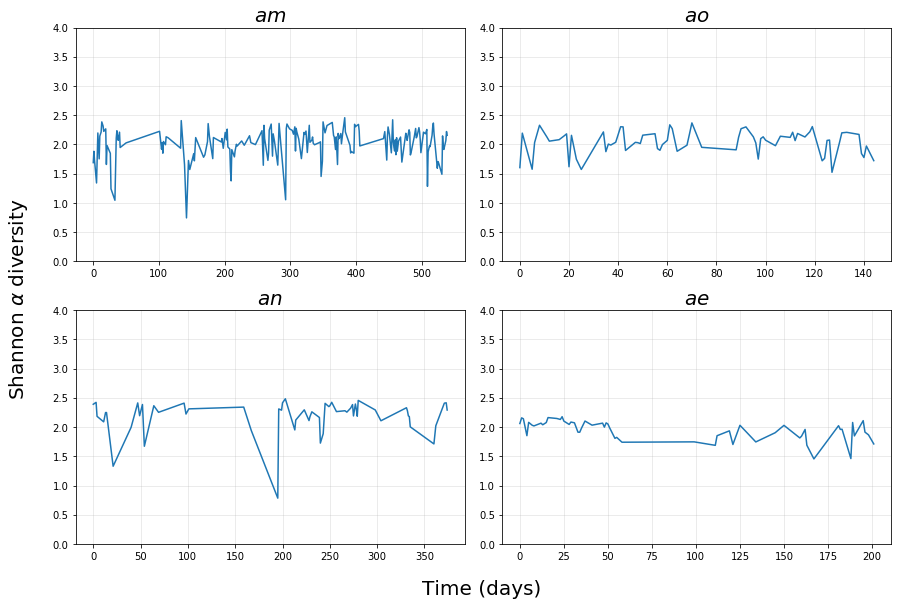

In [26]:
fig,axs = plt.subplots(2,2,figsize=(12,8))

axs = axs.ravel()

axs[0].set_title(r'$\mathit{am}$',size=20)
axs[0].plot(dates_am,(-df_am*np.log(df_am)).sum().values);

axs[1].set_title(r'$\mathit{ao}$',size=20)
axs[1].plot(dates_ao,(-df_ao*np.log(df_ao)).sum().values);

axs[2].set_title(r'$\mathit{an}$',size=20)
axs[2].plot(dates_an,(-df_an*np.log(df_an)).sum().values);

axs[3].set_title(r'$\mathit{ae}$',size=20)
axs[3].plot(dates_ae,(-df_ae*np.log(df_ae)).sum().values);

for i in range(4):
    axs[i].set_ylim([0,4])
    axs[i].grid(True,alpha=.3)
    
fig.tight_layout()

fig.text(-0.04,.62,r"Shannon $\alpha$ diversity",size=20,rotation=90)

fig.text(.44,-0.04,"Time (days)",size=20)

# Gamma abundance fluctuation distribution

In [27]:
## Adapted from code/derivation by Jacopo Grilli

def get_gamma_prediction(x_range, k,offset,scale):

    x_range = (x_range - offset)/scale
    k_digamma = special.digamma(k)
    k_trigamma = special.polygamma(1,k)

    gammalog = k*k_trigamma*x_range - np.exp(np.sqrt(k_trigamma)*x_range + k_digamma) - np.log(special.gamma(k)) + k*k_digamma + np.log10(np.exp(1))

    return 10**(gammalog)


In [31]:
numbins = 30
xbins = np.linspace(-2.5,2.5,numbins)
a = []
for strain in df.index:
    
    s = df.loc[strain].values
    s = s[s>0]
    sfreq = list(np.log10(s))
    a.append(sfreq)

SFREQ = []
A = []
for elem in a:
    elem = np.array(elem)
    rescaled = list((elem - np.mean(elem))/(np.std(elem)))
    A.extend(rescaled)
    h = list(plt.hist(rescaled,density=True,bins=xbins))
    H = h[0]

    SFREQ.append((xbins[1:][H>0],H[H>0]))

numbins = 30

xbins = np.log10(np.logspace(-2.5,2.5,numbins))

h = list(plt.hist(A,density=True,bins=xbins))

plt.close()

/u/home/r/rwolff/.conda/envs/strain_stability_env/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [32]:
gm_fitlog,opt=curve_fit(get_gamma_prediction, h[1][1:], h[0])

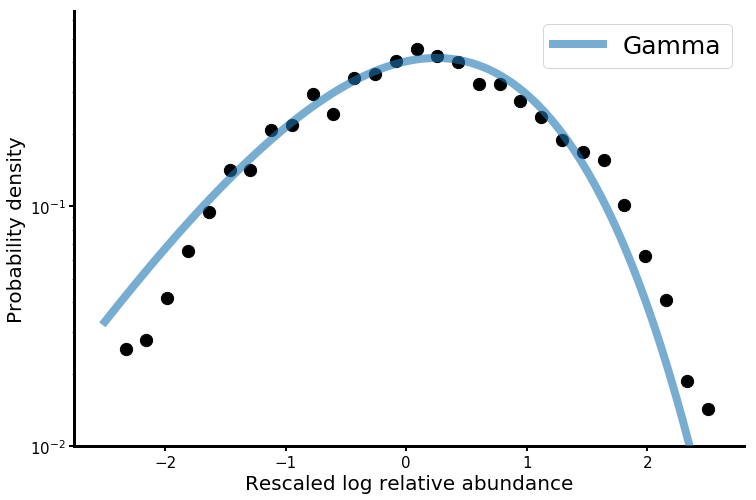

In [34]:
fig,f2_ax_RG = plt.subplots(figsize=(12,8))

f2_ax_RG.tick_params(axis='both', which='major', labelsize=15)
f2_ax_RG.spines['top'].set_visible(False)
f2_ax_RG.spines['right'].set_visible(False)
f2_ax_RG.spines['left'].set_linewidth(3)
f2_ax_RG.spines['bottom'].set_linewidth(3)
f2_ax_RG.tick_params('both', length=5, width=2, which='major')

x_range = np.logspace(-2.5,2.5,100000)

x_lin_space = np.linspace(-2.5 , 2.5, 10000)
f2_ax_RG.plot(x_lin_space, get_gamma_prediction(x_lin_space,*gm_fitlog), zorder=200,lw=8,alpha=.6,label="Gamma")

f2_ax_RG.semilogy()

f2_ax_RG.scatter(h[1][1:],h[0],s=150,c="k")

f2_ax_RG.set_ylim([1e-2,.65])

f2_ax_RG.set_xlabel("Rescaled log relative abundance",size=20)
f2_ax_RG.set_ylabel("Probability density",size=20)

f2_ax_RG.legend(prop={'size': 25});

In [101]:
numbins = 50
xbins = np.linspace(-5,5,numbins)

fprau_ab = df_ao.loc["Faecalibacterium_prausnitzii_61481_A"]
fprau_ab_log = np.log10(fprau_ab[fprau_ab.notna()])
fprau_ab_log_rescaled = list(fprau_ab_log - np.mean(fprau_ab_log))/(np.std(fprau_ab_log))

fprau_h = list(plt.hist(fprau_ab_log_rescaled,density=True,bins=xbins))
fprau_H = fprau_h[0]

plt.close()

fprau_toplot = xbins[1:][fprau_H>0],fprau_H[fprau_H>0]

In [102]:
numbins = 50
xbins = np.linspace(-5,5,numbins)

fprau_ab2 = df_ao.loc["Faecalibacterium_prausnitzii_61481_B"]
fprau_ab2_log = np.log10(fprau_ab2[fprau_ab2.notna()])
fprau_ab2_log_rescaled = list(fprau_ab2_log - np.mean(fprau_ab2_log))/(np.std(fprau_ab2_log))

fprau2_h = list(plt.hist(fprau_ab2_log_rescaled,density=True,bins=xbins))
fprau2_H = fprau2_h[0]

plt.close()

fprau2_toplot = xbins[1:][fprau2_H>0],fprau2_H[fprau2_H>0]

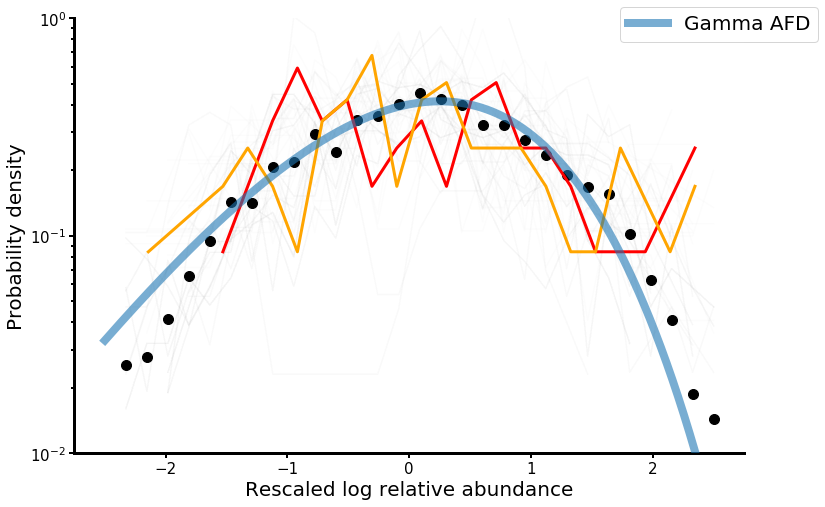

In [103]:
fig,f2_ax_RG = plt.subplots(figsize=(12,8))

f2_ax_RG.tick_params(axis='both', which='major', labelsize=15)
f2_ax_RG.spines['top'].set_visible(False)
f2_ax_RG.spines['right'].set_visible(False)
f2_ax_RG.spines['left'].set_linewidth(3)
f2_ax_RG.spines['bottom'].set_linewidth(3)
f2_ax_RG.tick_params('both', length=5, width=2, which='major')

x_range = np.logspace(-2.5,2.5,100000)

x_lin_space = np.linspace(-2.5 , 2.5, 10000)
f2_ax_RG.plot(x_lin_space, get_gamma_prediction(x_lin_space,*gm_fitlog), zorder=200,lw=8,alpha=.6,label="Gamma AFD")

f2_ax_RG.plot(h[1][1:],h[0],'.',markersize=20,c="k")

f2_ax_RG.plot(fprau_toplot[0],fprau_toplot[1],c="red",lw=3)
f2_ax_RG.plot(fprau2_toplot[0],fprau2_toplot[1],c="orange",lw=3)

for e in SFREQ:
    xx,yy = e[0],e[1]
    f2_ax_RG.plot(xx,yy,color="grey",alpha=.02,zorder=1)                                                                                                                            
                                                                                                                              
f2_ax_RG.set_ylim([1e-2,1])
f2_ax_RG.semilogy()

f2_ax_RG.tick_params('y', length=3, width=2, which='minor')


f2_ax_RG.set_xlabel("Rescaled log relative abundance",size=20)
f2_ax_RG.set_ylabel("Probability density",size=20);
f2_ax_RG.legend(loc="upper left",bbox_to_anchor=(.8, 1.05),prop={'size': 20});